In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
spy = pd.read_csv('spy.csv', parse_dates=['Date'], index_col='Date')

In [15]:
spy_dailyreturns = spy['Adj Close'].pct_change().dropna()

In [16]:
spy_dailyreturns

Date
1993-02-01    0.007112
1993-02-02    0.002119
1993-02-03    0.010571
1993-02-04    0.004184
1993-02-05   -0.000695
                ...   
2023-08-21    0.006506
2023-08-22   -0.002709
2023-08-23    0.011138
2023-08-24   -0.013859
2023-08-25    0.007050
Name: Adj Close, Length: 7698, dtype: float64

In [17]:
spy_dailyreturns.mean()

np.float64(0.00044288550166599473)

In [18]:
spy_dailyreturns.groupby(spy_dailyreturns.index.year).mean()

Date
1993    0.000375
1994    0.000038
1995    0.001295
1996    0.000833
1997    0.001222
1998    0.001100
1999    0.000801
2000   -0.000294
2001   -0.000408
2002   -0.000827
2003    0.001040
2004    0.000428
2005    0.000208
2006    0.000606
2007    0.000250
2008   -0.001477
2009    0.001069
2010    0.000620
2011    0.000180
2012    0.000626
2013    0.001136
2014    0.000526
2015    0.000096
2016    0.000484
2017    0.000792
2018   -0.000129
2019    0.001110
2020    0.000888
2021    0.001036
2022   -0.000683
2023    0.000943
Name: Adj Close, dtype: float64

In [30]:
#for average monthly return 
monthly_returns = (1+spy_dailyreturns).resample('ME').prod() -1 
monthly_return
grouped_returns = monthly_return.groupby(monthly_return.index.month).mean()


grouped_returns1993_2003 = monthly_return['1993':'2003'].groupby(monthly_return['1993':'2003'].index.month).mean()
grouped_returns2004_2023 = monthly_return['2004':'2013'].groupby(monthly_return['2004':'2013'].index.month).mean()

<Figure size 1000x600 with 0 Axes>

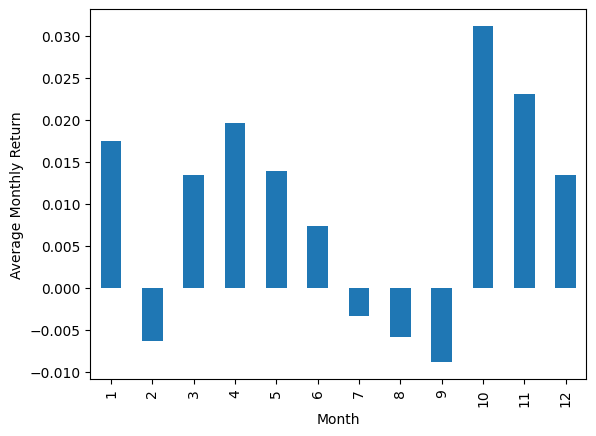

<Figure size 1000x600 with 0 Axes>

In [31]:
grouped_returns1993_2003.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Monthly Return')
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

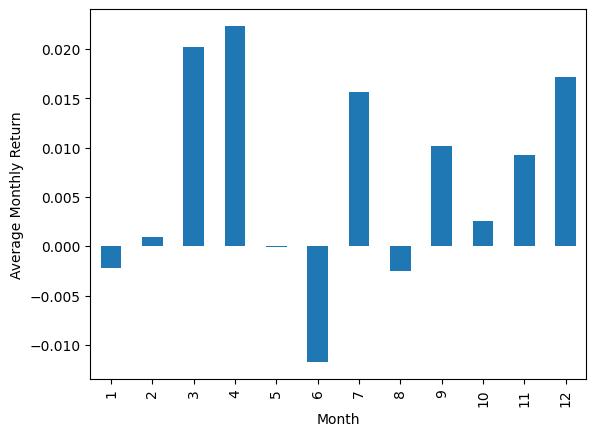

<Figure size 1000x600 with 0 Axes>

In [32]:
grouped_returns2004_2023.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Monthly Return')
plt.figure(figsize=(10,6))

### Homework code starts

In [34]:
import pandas as pd
import numpy as np      
import matplotlib.pyplot as plt 

In [35]:
spy_dailyreturns = spy['Close'].pct_change().dropna()

In [48]:
firstdayreturns = spy_dailyreturns[spy_dailyreturns.index.day == 1] # this is wrong because not every month has 1st as trading day 
firstdayreturns

Date
1993-02-01    0.007112
1993-03-01   -0.002815
1993-04-01   -0.003458
1993-06-01    0.009675
1993-07-01   -0.002774
                ...   
2023-02-01    0.010628
2023-03-01   -0.003836
2023-05-01   -0.001010
2023-06-01    0.009501
2023-08-01   -0.002862
Name: Close, Length: 238, dtype: float64

In [67]:
firstdayreturns = spy_dailyreturns.resample('BMS').first()
display(firstdayreturns)
display(firstdayreturns.groupby(firstdayreturns.index.year).mean())
print("{:.3%}".format(firstdayreturns.mean()))
        

Date
1993-02-01    0.007112
1993-03-01   -0.002815
1993-04-01   -0.003458
1993-05-03    0.006388
1993-06-01    0.009675
                ...   
2023-04-03    0.003811
2023-05-01   -0.001010
2023-06-01    0.009501
2023-07-03    0.001151
2023-08-01   -0.002862
Freq: BMS, Name: Close, Length: 367, dtype: float64

Date
1993    0.002214
1994   -0.003043
1995    0.000499
1996    0.006733
1997    0.009454
1998    0.007859
1999    0.002881
2000    0.005234
2001    0.001007
2002    0.000095
2003    0.008035
2004    0.004191
2005    0.002281
2006    0.002212
2007    0.001264
2008   -0.003583
2009    0.002042
2010    0.009977
2011   -0.005547
2012    0.002303
2013    0.005137
2014   -0.004005
2015    0.002190
2016    0.001164
2017    0.003308
2018    0.000633
2019   -0.000586
2020    0.003716
2021    0.003818
2022    0.002510
2023    0.001647
Name: Close, dtype: float64

0.245%


In [66]:
thirdlastdayreturns = spy_dailyreturns.resample('BME').apply(lambda x: x.iloc[-3])
display(thirdlastdayreturns)
display(thirdlastdayreturns.groupby(thirdlastdayreturns.index.year).mean())
print("{:.3%}".format(thirdlastdayreturns.mean()))

Date
1993-02-26    0.012876
1993-03-31    0.004175
1993-04-30   -0.002137
1993-05-31    0.012491
1993-06-30    0.011165
                ...   
2023-04-28   -0.004236
2023-05-31    0.012951
2023-06-30    0.000504
2023-07-31   -0.006630
2023-08-31    0.011138
Freq: BME, Name: Close, Length: 367, dtype: float64

Date
1993    0.003073
1994   -0.001359
1995    0.002384
1996   -0.002221
1997    0.003859
1998   -0.000546
1999    0.000697
2000   -0.000235
2001   -0.004315
2002   -0.005199
2003    0.003149
2004    0.001468
2005    0.001348
2006    0.003019
2007    0.003186
2008    0.000611
2009   -0.001234
2010    0.001455
2011    0.005934
2012    0.003964
2013    0.002525
2014   -0.000632
2015    0.002460
2016    0.002005
2017    0.002639
2018   -0.000073
2019   -0.000455
2020   -0.004525
2021   -0.003941
2022    0.002512
2023    0.002485
Name: Close, dtype: float64

0.075%


In [71]:
irx = pd.read_csv('^IRX.csv', parse_dates=['Date'], index_col='Date')
irx

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1960-01-04,4.520,4.520,4.520,4.520,4.520,0.0
1960-01-05,4.550,4.550,4.550,4.550,4.550,0.0
1960-01-06,4.680,4.680,4.680,4.680,4.680,0.0
1960-01-07,4.630,4.630,4.630,4.630,4.630,0.0
1960-01-08,4.590,4.590,4.590,4.590,4.590,0.0
...,...,...,...,...,...,...
2023-09-05,5.273,5.285,5.248,5.278,5.278,0.0
2023-09-06,5.308,5.310,5.200,5.300,5.300,0.0
2023-09-07,5.293,5.293,5.283,5.283,5.283,0.0


In [100]:
spyirx = pd.merge(spy, irx['Close'] , left_index=True, right_index=True, how='outer')     
spyirx.rename(columns={'Close_y':'Close_IRX'}, inplace=True)
spyirx['Close_IRX'] = spyirx['Close_IRX'].fillna(method='ffill')
spyirx = spyirx.dropna()
display(spyirx)

C:\Users\YOGA\AppData\Local\Temp\ipykernel_18968\3120363475.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spyirx['Close_IRX'] = spyirx['Close_IRX'].fillna(method='ffill')


,Open,High,Low,Close_x,Adj Close,Volume,Close_IRX
Date,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.029371,1003200.0,2.900
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.207384,480500.0,2.900
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.260788,201300.0,2.960
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.527826,529400.0,2.930
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.634632,531500.0,2.900
...,...,...,...,...,...,...,...
2023-08-21,437.549988,440.109985,435.320007,439.339996,439.339996,68719000.0,5.280
2023-08-22,441.179993,441.179993,437.570007,438.149994,438.149994,65062900.0,5.295
2023-08-23,439.250000,443.670013,439.100006,443.029999,443.029999,68441000.0,5.295


In [101]:
spyirx.loc['2016-10-07':'2016-10-20']

,Open,High,Low,Close_x,Adj Close,Volume,Close_IRX
Date,,,,,,,
2016-10-07,216.100006,216.300003,214.190002,215.039993,191.093491,89788300.0,0.310
2016-10-10,216.160004,216.699997,215.990005,216.160004,192.088745,51855000.0,0.310
2016-10-11,215.660004,215.740005,212.580002,213.429993,189.662781,130367400.0,0.320
2016-10-12,213.589996,214.320007,213.009995,213.710007,189.911606,73866100.0,0.340
2016-10-13,212.160004,213.589996,211.210007,213.009995,189.289581,101357000.0,0.275
2016-10-14,214.149994,214.690002,213.029999,213.119995,189.387299,93346200.0,0.290
2016-10-17,213.089996,213.389999,212.169998,212.380005,188.729736,58275700.0,0.295
2016-10-18,214.240005,214.309998,213.270004,213.710007,189.911606,76869700.0,0.333
2016-10-19,214.020004,214.639999,213.600006,214.279999,190.418167,66519200.0,0.323
